In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("zomato.csv", encoding='latin-1')  # latin-1 fixes encoding errors

# Preview the data
print(df.shape)
df.head()

(9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
# Checking for null values in each column
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [3]:
# Viewing basic info about columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
# Show all column names to verify which ones are present
df.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [5]:
# Dropping columns not useful for analysis
df.drop(['Restaurant ID', 'Longitude', 'Latitude'], axis=1, inplace=True)

# Renaming columns for clarity
df.rename(columns={
    'Restaurant Name': 'restaurant_name',
    'Country Code': 'country_code',
    'Locality': 'locality',
    'Locality Verbose': 'locality_verbose',
    'Average Cost for two': 'cost_for_two',
    'Has Table booking': 'table_booking',
    'Has Online delivery': 'online_delivery',
    'Is delivering now': 'delivering_now',
    'Switch to order menu': 'order_menu_switch',
    'Price range': 'price_range',
    'Aggregate rating': 'rating',
    'Rating color': 'rating_color',
    'Rating text': 'rating_text'
}, inplace=True)

# Preview the cleaned data
print("Cleaned data shape:", df.shape)
df.head()

Cleaned data shape: (9551, 18)


,restaurant_name,country_code,City,Address,locality,locality_verbose,Cuisines,cost_for_two,Currency,table_booking,online_delivery,delivering_now,order_menu_switch,price_range,rating,rating_color,rating_text,Votes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Top 10 Cities by Restaurant Count:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


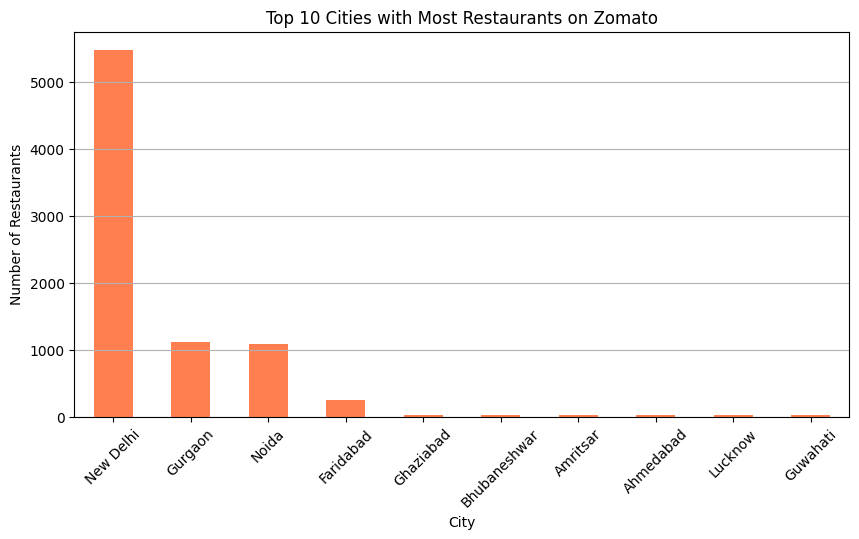

In [6]:
# Count of restaurants by city (Top 10)
top_cities = df['City'].value_counts().head(10)

# Display counts
print("Top 10 Cities by Restaurant Count:\n", top_cities)

# Visualize
plt.figure(figsize=(10,5))
top_cities.plot(kind='bar', color='coral')
plt.title("Top 10 Cities with Most Restaurants on Zomato")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Top 10 Cuisines:
 Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


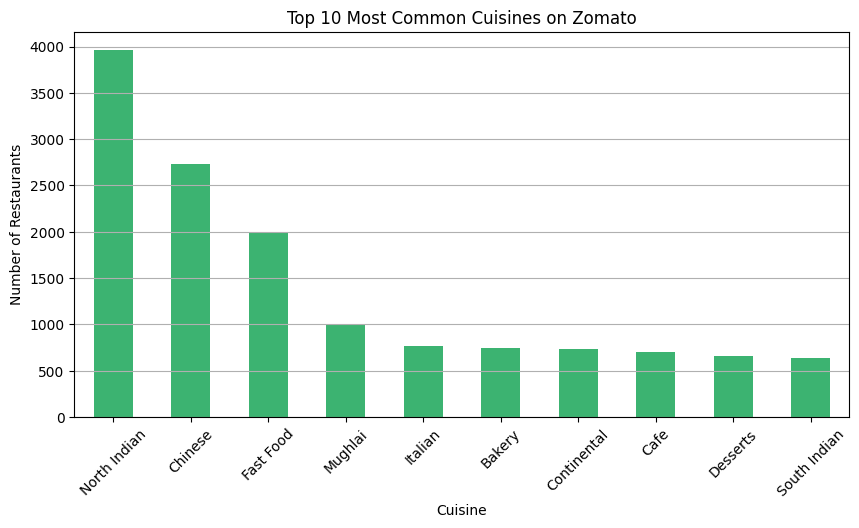

In [7]:
# Splitting multiple cuisines and counting the most frequent ones
cuisines_series = df['Cuisines'].dropna().str.split(',').explode().str.strip()

# Get the top 10 cuisines
top_cuisines = cuisines_series.value_counts().head(10)

# Display top cuisines
print("Top 10 Cuisines:\n", top_cuisines)

# Visualize
plt.figure(figsize=(10,5))
top_cuisines.plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 Most Common Cuisines on Zomato")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Average Rating by Price Range:
 price_range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: rating, dtype: float64


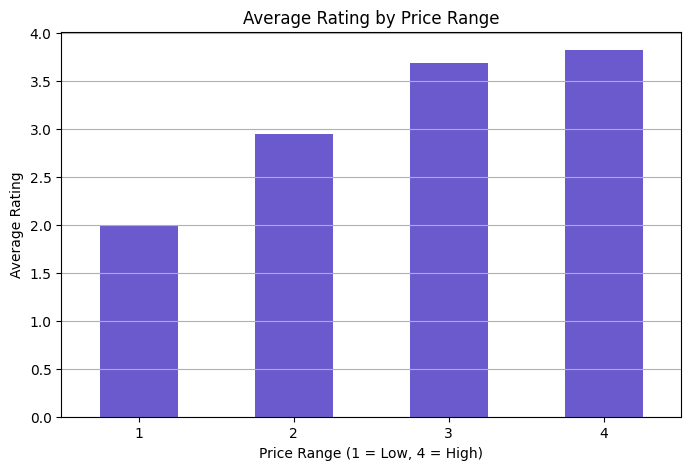

In [8]:
# Grouping average rating by price range
rating_by_price = df.groupby('price_range')['rating'].mean()

# Display
print("Average Rating by Price Range:\n", rating_by_price)

# Visualize
plt.figure(figsize=(8,5))
rating_by_price.plot(kind='bar', color='slateblue')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range (1 = Low, 4 = High)")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Online Delivery Availability:
 online_delivery
No     7100
Yes    2451
Name: count, dtype: int64


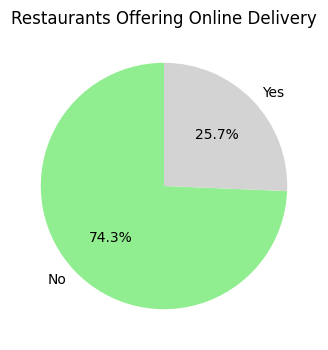

In [9]:
# Count of restaurants offering online delivery
delivery_counts = df['online_delivery'].value_counts()

# Display count
print("Online Delivery Availability:\n", delivery_counts)

# Visualize
plt.figure(figsize=(6, 4))
delivery_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightgray'])
plt.title("Restaurants Offering Online Delivery")
plt.ylabel("")  # Hide y-axis label
plt.show()